In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge line

The Pacific Dataviz Challenge is a competition for all—of any age, background or skillset—that encourages storytelling, design, innovation and technical skill in the visualisation of Pacific data.

Participants, individually or as a team, are invited to create data visualisations that highlight important issues or opportunities facing the Pacific region.

Your submission could be an infographic, animation, dashboard, web app, poster, PDF report, drawing—almost anything you can imagine and create.

# Theme (taken directly from site)

This year’s theme ‘Blue Pacific 2050’ references the long-term approach to working together as a region, the 2050 Strategy for the Blue Pacific Continent.

A shared vision, it shaped by and for Pacific peoples, cultures, and their deep connection to the land and ocean.

The Strategy focuses on seven key areas:

1. Political Leadership and Regionalism
2. People-Centred Development
3. Peace and Security
4. Resources and Economic Development
5. Climate Change and Disasters
6. Ocean and Environment
7. Technology and Connectivity.

# Exploration

Note that all datasets have been renamed from their original downloaded file names for ease-of-use

__Mapping__

- _Political Leadership and Regionalism_: `bp2050_pol_leadership.csv`
- _People-Centred Development_: `bp2050_ppl_centered_dev.csv`
- _Peace and Security_: `bp2050_peace_and_sec.csv`
- _Resources and Economic Development_: `bp2050_economic_dev.csv`
- _Climate Change and Disasters_: `bp2050_climate_change.csv`
- _Ocean and Environment_: `bp2050_ocean_and_env.csv`
- _Technology and Connectivity_: `bp2050_tech_and_conn.csv`

In [4]:
all_df = pd.read_csv("../data/bp2050_all.csv")
pol_df = pd.read_csv("../data/bp2050_pol_leadership.csv")
ppl_df = pd.read_csv("../data/bp2050_ppl_centered_dev.csv")
peace_df = pd.read_csv("../data/bp2050_peace_and_sec.csv")
eco_df = pd.read_csv("../data/bp2050_economic_dev.csv")
clim_df = pd.read_csv("../data/bp2050_climate_change.csv")
ocean_df = pd.read_csv("../data/bp2050_ocean_and_env.csv")
tech_df = pd.read_csv("../data/bp2050_tech_and_conn.csv")

dfs = [ # excluding all
    pol_df, # 2753 data-points
    ppl_df, # 12000 data-points
    peace_df, # 9 data-points
    eco_df, # 4533 data-points
    clim_df, # 2949 data-points
    ocean_df, # 978 data-points
    tech_df # 1731 data-points
]

## Investigative notes

- There's a mapping which I can't fully find on the site but it's much easier to understand and navigate in tandem with the datahubs UI
- Columns like `DATAFLOW` and `FREQ` probably aren't relevant for this shorter analysis and challenge

### Noted Mappings:

`_T` indicates Total and `_Z` means "Not stated" (or the equivalent)

- `GEO_PICT`: are the individual Pacific Island Countries and Territories
    - 'FM': Micronesia
    - 'TV': Tuvalu
    - 'NR': Nauru
    - 'VU': Vanuatu
    - 'PW':
    - 'TO': Tonga
    - 'MH': Mashall Islands
    - 'CK': Cook Islands
    - 'PG': Papua New Guinea
    - 'WS':
    - 'KI': Kiribati
    - 'SB':
    - 'FJ': Fiji
    - 'PF': French Polynesia
    - 'NU': Niue
    - 'NC': New caledonia
- `SEX`:
    - '_T': Total
    - 'F': Female
    - 'M': Male
- `AGE`: Provided as ranges (`Y` = start of range and `T` = end of range)
- `URBANIZATION`:
    - '_T': Total
    - 'U': Urban
    - 'R': Rural
- `INCOME`: Denotes quintiles, bottom 40\%, and top 60\%
- `EDUCATION`: Specific range based on entry
- `OCCUPATION`: Specific mapping based on entry
- `COMPOSITE_BREAKDOWN`: Special groups based on theme

In [20]:
for df in dfs:
    print(len(df))

2753
12000
9
4533
2949
978
1731


<Axes: xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

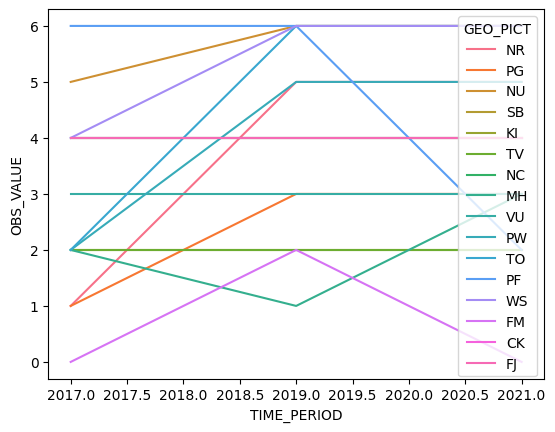

In [70]:
sub = ppl_df[ppl_df["INDICATOR"] == "BPI_MANAF5"][
    [
        "INDICATOR",
        "COMPOSITE_BREAKDOWN",
        "GEO_PICT",
        "UNIT_MEASURE",
        "REPORTING_TYPE",
        "NATURE",
        "TIME_PERIOD",
        "OBS_VALUE",
        "UNIT_MEASURE"
    ]
]
sns.lineplot(
    data=sub,
    x="TIME_PERIOD",
    y="OBS_VALUE",
    hue="GEO_PICT"
)

# Area of Interest

Discussion around safe water, sanitation, and hygeine

Indicator mappings (gathered via manual checking and validation)

- `SH_H2O_IMPR`: Population using an improved drinking water source
- `SH_MED_DEN`: Health worker density
- `SH_STA_WASH`: Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene
- `BPI_MANAF5`: Healthy food policies in schools
- `SE_ACS_H2O`: Proportion of schools with access to basic drinking water
- `SH_SAN_SAFE`: Proportion of population using safely managed sanitation services
- `SPC_6_3_1`: Proportion of wastewater safely treated

In [96]:
target_df = pd.read_csv("../data/filtered_water_data_theme_2.csv")
target_inds = pd.unique(target_df["INDICATOR"])

target_df = ppl_df[ppl_df["INDICATOR"].isin(target_inds)]

In [99]:
target_df \
    .dropna(subset=["OBS_VALUE"]) \
    .tail(100) \
    [
        [
            "INDICATOR",
            "COMPOSITE_BREAKDOWN",
            "GEO_PICT",
            "UNIT_MEASURE",
            "REPORTING_TYPE",
            "NATURE",
            "URBANIZATION",
            "TIME_PERIOD",
            "OBS_VALUE",
            "UNIT_MEASURE"
        ]
    ] \
    .sort_values(by=["GEO_PICT","TIME_PERIOD"])

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,UNIT_MEASURE,REPORTING_TYPE,NATURE,URBANIZATION,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
9895,SH_MED_DEN,_Z,FJ,PER_10000_POP,G,_X,_T,1999,3.26,PER_10000_POP
9896,SH_MED_DEN,_Z,FJ,PER_10000_POP,G,_X,_T,2003,4.39,PER_10000_POP
9897,SH_MED_DEN,_Z,FJ,PER_10000_POP,G,_X,_T,2008,3.73,PER_10000_POP
9898,SH_MED_DEN,_Z,FJ,PER_10000_POP,G,_X,_T,2009,4.10,PER_10000_POP
9899,SH_MED_DEN,_Z,FJ,PER_10000_POP,G,_X,_T,2013,7.70,PER_10000_POP
...,...,...,...,...,...,...,...,...,...,...
10652,SH_MED_DEN,_Z,WS,PER_1000_POP,N,C,_T,2015,0.32,PER_1000_POP
10718,SH_H2O_IMPR,_Z,WS,RATIO_POP,N,C,_T,2015,97.30,RATIO_POP
10619,SH_STA_WASH,_Z,WS,PER_100000_POP,G,_X,_T,2016,1.49,PER_100000_POP
10620,SH_STA_WASH,_Z,WS,PER_100000_POP,G,_X,_T,2019,8.20,PER_100000_POP
